<a href="https://colab.research.google.com/github/SungjooHwang/ICTclass/blob/main/Ex03_2_Classification_HeartData_CV_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# We will use randomforest classfier
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold # Added for Cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import shap #ADDED

In [3]:
# Load data
df = pd.read_csv('Ex03_2_heartData.csv')
X = pd.get_dummies(df.drop(columns=['HeartDisease']), drop_first=True)
y = df['HeartDisease']
print(f"Total observations: {len(df)}")

Total observations: 427


In [4]:
# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [5]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
# Accuracy (cross-validated)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validated Accuracy Scores (5-Fold): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-Validated Accuracy Scores (5-Fold): [0.68604651 0.72093023 0.72941176 0.72941176 0.77647059]
Mean Accuracy: 0.7285 (+/- 0.0289)


In [7]:
# Predictions from CV
y_pred = cross_val_predict(model, X, y, cv=cv)

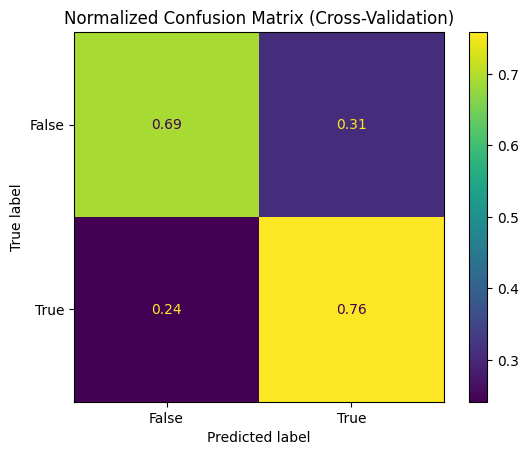

In [8]:
# Confusion matrix (normalized)
cm = confusion_matrix(y, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()
disp.ax_.set_title("Normalized Confusion Matrix (Cross-Validation)")
plt.show()

In [9]:
# ==================== SHAP Analysis ====================

# Train model on full dataset
model.fit(X, y)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

In [10]:
# Class 0 (Healthy)
shap_vals_class0 = shap_values[:, :, 0]
print(f"Class 0 shape: {shap_vals_class0.shape}")

# Class 1 (HeartDisease)
shap_vals_class1 = shap_values[:, :, 1]
print(f"Class 1 shape: {shap_vals_class1.shape}")

Class 0 shape: (427, 11)
Class 1 shape: (427, 11)



=== Feature Importance for Class 0 (Healthy) ===


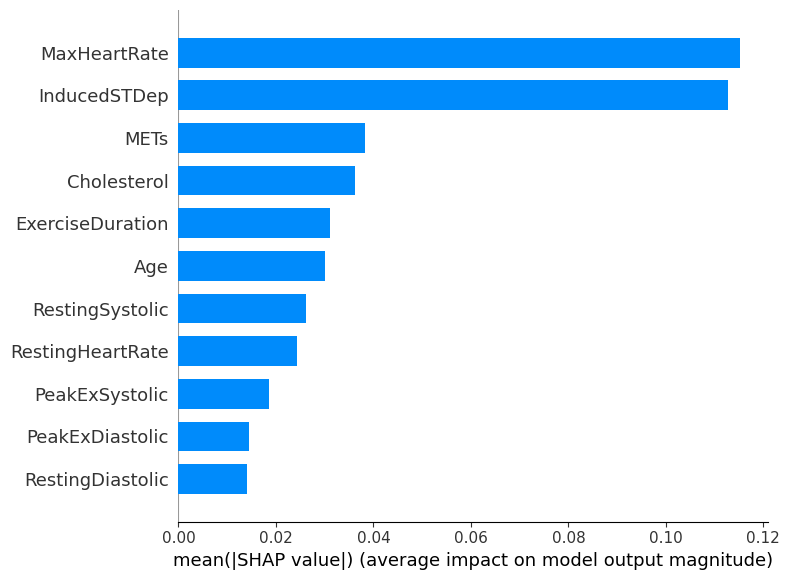

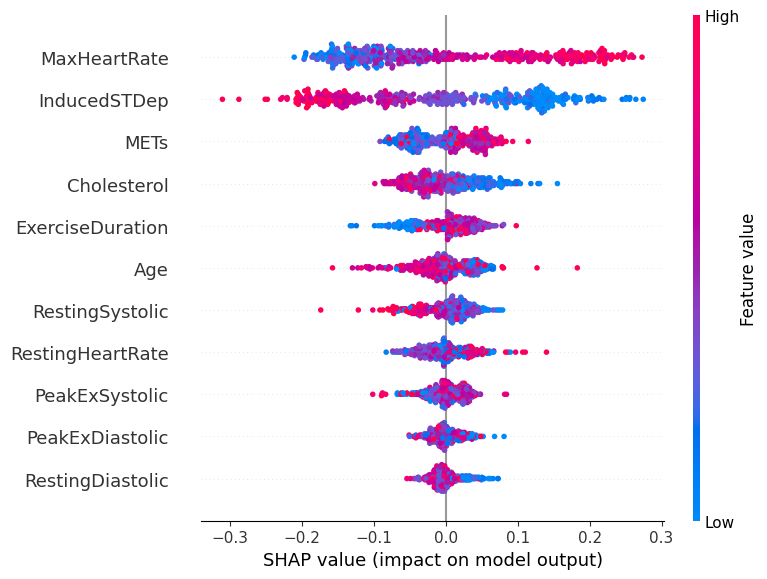


=== Feature Importance for Class 1 (HeartDisease) ===


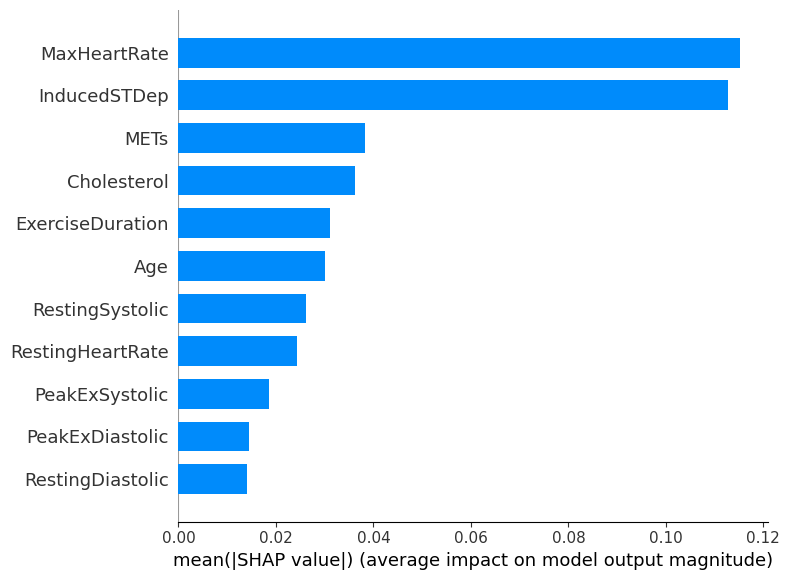

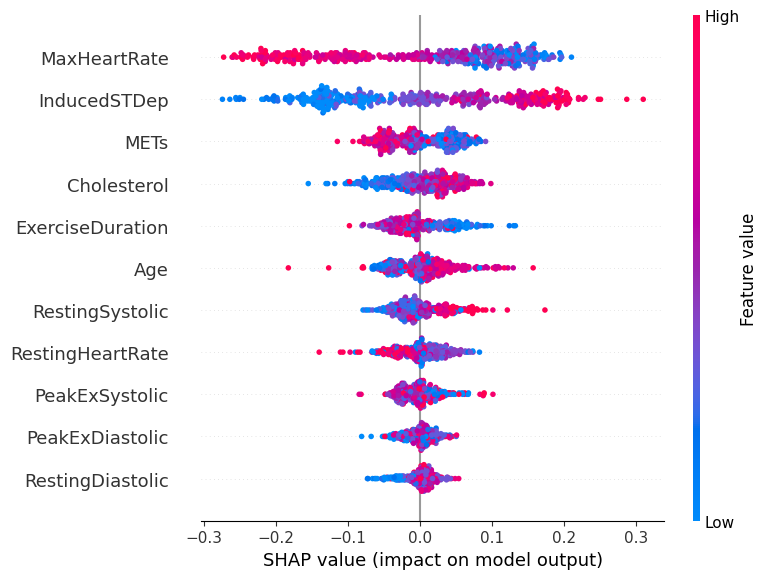

In [11]:
# ------------------ Plots ------------------
# 1. Feature importance (absolute) bar plot for class 0
print("\n=== Feature Importance for Class 0 (Healthy) ===")
shap.summary_plot(shap_vals_class0, X, plot_type="bar")

# 2. Beeswarm plot for class 0
shap.summary_plot(shap_vals_class0, X)

# 3. Feature importance (absolute) bar plot for class 1
print("\n=== Feature Importance for Class 1 (HeartDisease) ===")
shap.summary_plot(shap_vals_class1, X, plot_type="bar")

# 4. Beeswarm plot for class 1
shap.summary_plot(shap_vals_class1, X)

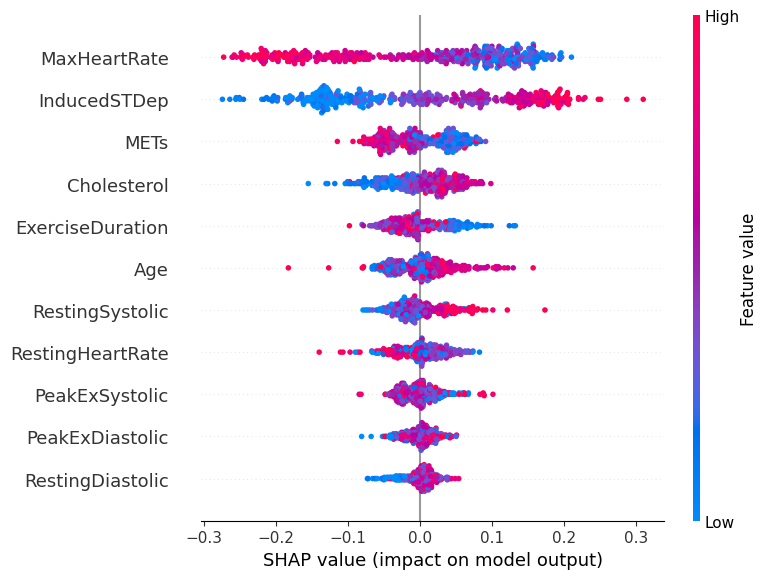

In [ ]:
# 2. Beeswarm plot (default summary plot)
shap.summary_plot(shap_vals_class1, X)
